In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models, layers, regularizers
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
train_data_dir = 'ZhangLabData/CellData/chest_xray/train'
test_data_dir = 'ZhangLabData/CellData/chest_xray/test'

#Get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
       test_data_dir, 
       target_size=(64, 64), batch_size=624, color_mode='grayscale', class_mode='binary')

#Get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
       train_data_dir, 
       target_size=(64, 64), batch_size=5232, color_mode='grayscale', class_mode='binary')

#Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 624 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.


#### Reshape  images

In [3]:
#train set
train_unrow = train_images.reshape(5232, -1)
train_unrow.shape

(5232, 4096)

In [4]:
#test set
test_unrow = test_images.reshape(624, -1)
test_unrow.shape

(624, 4096)

#### Labels for images

In [6]:
train_labels[:10]

array([1., 0., 1., 1., 0., 1., 1., 1., 0., 1.], dtype=float32)

In [7]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [112]:
train_unrow

array([[20., 27., 31., ...,  0.,  0.,  0.],
       [51., 50., 49., ...,  0.,  0.,  0.],
       [19., 26., 23., ...,  0.,  0.,  0.],
       ...,
       [18., 16., 37., ..., 25., 36., 53.],
       [31., 24., 16., ..., 11., 18., 17.],
       [ 1., 30., 38., ..., 19., 20., 20.]], dtype=float32)

In [8]:
#scaling the data
train_img_final = train_unrow/255
test_img_final = test_unrow/255

type(train_img_final)

numpy.ndarray

In [63]:
test_labels[:10]

array([1., 1., 1., 0., 1., 1., 0., 1., 1., 1.], dtype=float32)

In [9]:
print(train_img_final.shape)
print(test_img_final.shape)

(5232, 4096)
(624, 4096)


In [22]:


early_stopping = [EarlyStopping(monitor='val_loss', patience=10), ModelCheckpoint(filepath='best_model.h5',
                                                                                 monitor='val_loss', save_best_only=True)]

In [75]:
#plot epochs vs loss for train and test set
def visualize_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss v Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show();
    
#     plt.figure()
#     plt.plot(history['val_recall'])
#     plt.plot(history['recall'])
#     plt.legend(['val_recall', 'recall'])
#     plt.title('Epochs v Recall')
#     plt.xlabel('Epochs')
#     plt.ylabel('Recall')
#     plt.show();

In [74]:
history = results3.history
print(history.keys())

dict_keys(['loss', 'recall_8', 'val_loss', 'val_recall_8'])


In [146]:
#CNN model
np.random.seed(42)
model3 = models.Sequential()
model3.add(layers.Conv2D(2, (3,3), activation='relu',
                        input_shape=(64, 64, 1)))

model3.add(layers.Flatten())
# model3.add(layers.Dense(64, activation='selu'))
# model3.add(layers.Dense(42, activation='selu'))
model3.add(layers.Dense(2, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [147]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 2)         20        
_________________________________________________________________
flatten_9 (Flatten)          (None, 7688)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 15378     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 3         
Total params: 15,401
Trainable params: 15,401
Non-trainable params: 0
_________________________________________________________________


In [148]:
import keras

optimizer = keras.optimizers.SGD(lr=0.00001)
model3.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

results3 = model3.fit(train_images,
                    train_labels,
                    callbacks=early_stopping,
                    epochs=10,
                    batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/10
41/41 [==============================] - 2s 45ms/step - loss: 2.0830 - recall_21: 0.7404 - val_loss: 1.4027 - val_recall_21: 0.7795
Epoch 2/10
41/41 [==============================] - 2s 40ms/step - loss: 1.1846 - recall_21: 0.8112 - val_loss: 1.1171 - val_recall_21: 0.8077
Epoch 3/10
41/41 [==============================] - 2s 40ms/step - loss: 0.9447 - recall_21: 0.8298 - val_loss: 1.3704 - val_recall_21: 0.9615
Epoch 4/10
41/41 [==============================] - 2s 39ms/step - loss: 0.7779 - recall_21: 0.8612 - val_loss: 0.8131 - val_recall_21: 0.8205
Epoch 5/10
41/41 [==============================] - 2s 40ms/step - loss: 0.6764 - recall_21: 0.8681 - val_loss: 0.8637 - val_recall_21: 0.9333
Epoch 6/10
41/41 [==============================] - 2s 39ms/step - loss: 0.5954 - recall_21: 0.8823 - val_loss: 0.7751 - val_recall_21: 0.9359
Epoch 7/10
41/41 [==============================] - 2s 42ms/step - loss: 0.5379 - recall_21: 0.8905 - val_loss: 0.7170 - val_recall_21: 0.9308

In [149]:
results_train3 = model3.evaluate(train_images, train_labels)

164/164 [==============================] - 1s 6ms/step - loss: 0.4275 - recall_21: 0.8918


In [150]:
results_test3 = model3.evaluate(test_images, test_labels)

20/20 [==============================] - 0s 5ms/step - loss: 0.6529 - recall_21: 0.9410


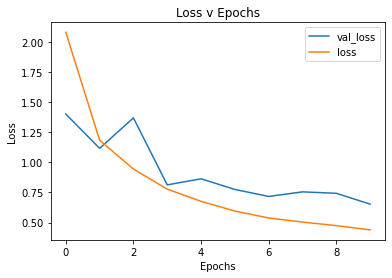

In [151]:
visualize_results(results3)

In [152]:
label_pred = (model3.predict(test_images) > 0.5).astype(int)

cf_matrix = confusion_matrix(test_labels, label_pred)

In [44]:
type(label_pred[0])

numpy.ndarray

In [121]:
F = model3.predict(test_images)

In [122]:
F

array([[7.81106114e-01],
       [9.95914936e-01],
       [9.98605013e-01],
       [7.64084160e-02],
       [9.99852180e-01],
       [9.85922575e-01],
       [6.64964259e-01],
       [9.99990582e-01],
       [9.94268835e-01],
       [9.99781311e-01],
       [9.95977223e-01],
       [9.15678263e-01],
       [6.22864962e-02],
       [6.65930510e-01],
       [1.55667156e-01],
       [5.25220394e-01],
       [9.98842001e-01],
       [9.96062994e-01],
       [9.99226213e-01],
       [9.99875784e-01],
       [3.14722955e-02],
       [9.95431602e-01],
       [9.99990940e-01],
       [9.98722672e-01],
       [9.65809882e-01],
       [7.61114657e-01],
       [9.98334289e-01],
       [8.70939612e-01],
       [2.24770337e-01],
       [9.98162746e-01],
       [2.26087272e-02],
       [9.69037533e-01],
       [3.61112773e-01],
       [9.97234225e-01],
       [6.63600981e-01],
       [9.97486591e-01],
       [8.68250608e-01],
       [9.99993443e-01],
       [9.99537885e-01],
       [5.21340489e-01],


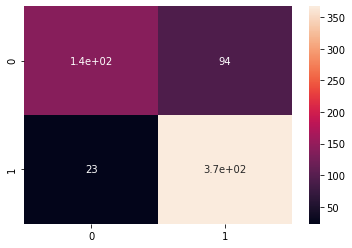

In [153]:
import seaborn as sns

sns.heatmap(cf_matrix, annot=True);